In [122]:

import os
import pickle
import pandas as pd
import sys
import sys
from memory_profiler import profile
import pandas as pd
import numpy as np
sys.path.append('/home/ak/Documents/Research/PaperCode/MultiKernelLearning')
sys.path.append('/home/ak/Documents/Research/PaperCode/singlekernelclf/')
import jsonpickle
from collections import defaultdict
from sklearn.svm import SVC
from collections import OrderedDict
import os
from sklearn.metrics import accuracy_score
import torch


from fileutils import new_feature_utils as nfu
from fileutils.new_feature_utils import CreateMarketFeatures
import multiprocessing
import mkl_data_processing as mkldp


In [8]:
from fileutils import DataLoader as DataLoader
from fileutils import paths
from fileutils import new_feature_utils as nfu
from fileutils.new_feature_utils import CreateMarketFeatures

In [9]:
def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')

    return pickle_to_file


def forward_Dates(list_of_keys, current_date):
    """
    return all the forward looking dates for each idxKey we use for training

    :param list_of_keys: dates i have model dates for out of sample
    :param current_date: current model date
    :return: forward dates for applying the fitted model
    """
    lookAheadKeys = sorted(i for i in list_of_keys if i > current_date)
    return lookAheadKeys


In [25]:
mainFolder  = '/media/ak/LaCie'

figures_destination = '/home/ak/Documents/Research/Papers/figures/'
dataFolder = laptopDataFolder
expLocsDirectories = os.path.join(laptopDataFolder, 'ExperimentCommonLocs')




In [27]:
os.listdir(expLocsDirectories)

['FittedModelsAprilModels2021',
 'LabelAnalysisResults',
 'MKLFittedModels',
 'CrossValidationResults',
 'MKLOOSPredictionsApril2021',
 'JointLocationsDicts',
 'OOSPredictions',
 'Labels_AlternateApril2021',
 'LabelsAlternateOne',
 'LabelsAlternateTwo',
 'LabelsAlternateThree',
 'LabelsAlternateFour',
 'LabelsAlternateFive',
 'LabelsAlternateSix',
 'FittedModels',
 'MKLOOSPredictions',
 'processedSingleKernelOOS']

In [29]:

alternate_labels_nos = {1:"LabelsAlternateOne", 2:"LabelsAlternateTwo", 3:"LabelsAlternateThree", 
                        4:"LabelsAlternateFour", 5:"LabelsAlternateFive", 6:"LabelsAlternateSix", 
                        7:"LabelsAlternateSeven"}  # we have 7 alternative data types

fittedModelsPath = os.path.join(mainPath, "ExperimentCommonLocs/FittedModels")
oosPredictionsPath = os.path.join(mainPath, "ExperimentCommonLocs/OOSPredictions")

In [128]:
nonzerodict = defaultdict(dict)
zerodict = defaultdict(dict)

In [129]:
label_idx = 1  # to be serialised


labelsLocation = os.path.join(expLocsDirectories, alternate_labels_nos[label_idx])

symbols = sorted(os.listdir(labelsLocation))
symbolIdx = 1
symbolLabelsFilesPath = os.path.join(labelsLocation, symbols[symbolIdx])

In [130]:
dates =[f.split(".csv")[0] for f in os.listdir(symbolLabelsFilesPath)]
len(symbols)

40

In [136]:
nonzerodict =dict()
zerodict = dict()
dateIdx = 0
for dateIdx in range(0, len(dates)-1):
    dateFile = os.path.join(symbolLabelsFilesPath, str(dates[dateIdx])+'.csv')
    df = pd.read_csv(dateFile)
    zerodict[dates[dateIdx]] = df[df['ReturnTradedPrice']==0]['Duration'].dropna()
    nonzerodict[dates[dateIdx]] = df[df['ReturnTradedPrice']!=0]['Duration'].dropna()
    

'APF.L'

In [94]:
## test check
testDate ='20170124'
test_loc = os.path.join(symbolLabelsFilesPath, str(testDate)+'.csv') 
test_df =pd.read_csv(test_loc)
test_df[test_df['Duration']!=0]['Duration']

1     2979.005827
2        4.119115
3        0.180616
4        4.830002
5       13.289631
6      140.576986
7      958.993628
8     3870.998883
9      152.006523
10      11.809207
11     291.373557
12      25.329528
13     878.466194
14     230.679948
15     699.344577
16     711.996410
17    3967.985471
18    5423.004890
19      34.995132
20      87.000567
21    2006.015469
22    3023.984282
Name: Duration, dtype: float64

In [137]:
nz_across_time =pd.DataFrame.from_dict(nonzerodict).fillna(0.01).median(axis =0)
nz_across_point_in_time =pd.DataFrame.from_dict(nonzerodict).fillna(0.01).median(axis =1)



In [138]:
z_across_time =pd.DataFrame.from_dict(zerodict).median(axis =0)
z_across_point_in_time =pd.DataFrame.from_dict(zerodict).median(axis =1)



In [139]:
z_across_time = pd.DataFrame.from_dict(zerodict).median(axis=0)
z_across_point_in_time = pd.DataFrame.from_dict(zerodict).median(axis=1)

In [140]:
duration_nz =nonzerodf['Duration']
duration_z = zerodf['Duration']

In [141]:
duration_nz.describe()

count      25.000000
mean     1107.223222
std      1776.976860
min         0.000022
25%         0.169926
50%       320.524294
75%      1445.998149
max      7807.039813
Name: Duration, dtype: float64

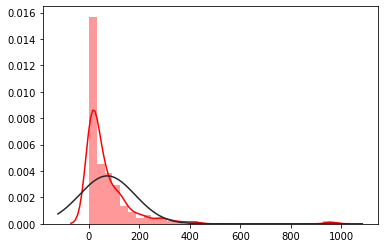

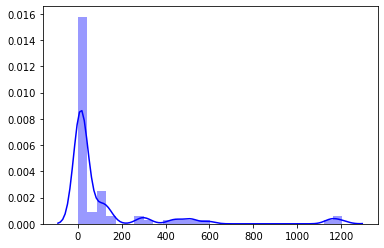

In [142]:
import seaborn as sns
from scipy.stats import norm, levy
import matplotlib.pyplot as plt
from scipy.stats import probplot
ax=sns.distplot(z_across_point_in_time, fit =norm ,kde= True, color = 'r', label ='Point in time')
plt.show()
ax2=sns.distplot(z_across_time,kde= True, color = 'b')



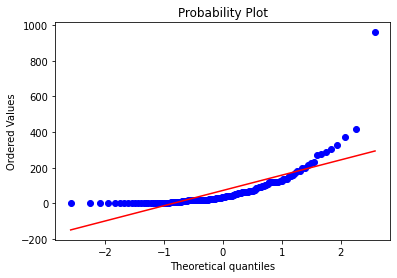

In [143]:
import pylab
g = probplot(z_across_point_in_time,dist='norm',plot=pylab)
pylab.show(g)   

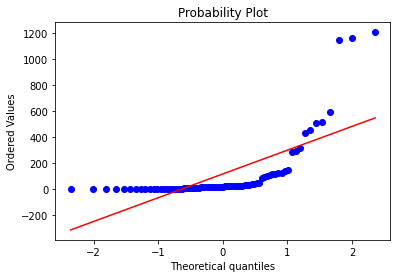

In [144]:
import pylab
g = probplot(z_across_time,dist='norm',plot=pylab)
pylab.show(g) 